In [72]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz

In [73]:
sample_1024 = pd.read_csv('../data/sample_1024.csv')
sample_1024

,id,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time_micros_delta
0,0,11264916,9.765453,0.083777,-1.087909,0.043066,-0.054062,0.003054,10241004.0
1,1,11266912,9.730146,0.055652,-1.090303,0.043066,-0.054062,0.003054,1996.0
2,2,11267912,9.775027,0.056849,-1.064571,0.043066,-0.054062,0.003054,1000.0
3,3,11268912,9.773830,0.100533,-1.080729,0.043066,-0.054062,0.003054,1000.0
4,4,11269912,9.740918,0.078392,-1.141766,0.043066,-0.054062,0.003054,1000.0
...,...,...,...,...,...,...,...,...,...
1019,1019,12284912,9.797767,0.073604,-1.174080,0.041539,-0.041844,0.021380,1000.0
1020,1020,12285912,9.771437,0.074801,-1.144758,0.041539,-0.041844,0.021380,1000.0
1021,1021,12286912,9.855813,0.095147,-1.218961,0.041539,-0.041844,0.021380,1000.0
1022,1022,12287912,9.764256,0.068219,-1.135782,0.041539,-0.041844,0.021380,1000.0


In [74]:
# Funktion zum Erstellen eines Butterworth-Tiefpassfilters
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist-Frequenz
    normal_cutoff = cutoff / nyq
    print(f"{normal_cutoff=}")
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

In [75]:
# Funktion zum Anwenden des Filters auf ein Signal
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [76]:
# berechnen den zeitabstand zwischen anfang und ende des samples
sample_time_delta_micro = sample_1024['time_micros'].iloc[-1] - sample_1024['time_micros'].iloc[0]
sample_time_delta_sec = sample_time_delta_micro / 1e6

sample_time_delta_micro, sample_time_delta_sec

(np.int64(1023996), np.float64(1.023996))

In [77]:
fs = len(sample_1024) / sample_time_delta_sec      # Abtastrate, in Hz
cutoff = 50.0    # Grenzfrequenz des Filters, in Hz
order = 5        # Ordnung des Filters

fs

np.float64(1000.0039062652589)

In [78]:
# todo filterung von spalte als funktion definieren
selected_columns = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

# signals ist liste von numpy arrays, jedes array ein signal (accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z)
signals = [sample_1024[col].values for col in selected_columns]
signals

[array([9.765453, 9.730146, 9.775027, ..., 9.855813, 9.764256, 9.703816]),
 array([0.083777, 0.055652, 0.056849, ..., 0.095147, 0.068219, 0.098139]),
 array([-1.087909, -1.090303, -1.064571, ..., -1.218961, -1.135782,
        -1.109452]),
 array([0.043066, 0.043066, 0.043066, ..., 0.041539, 0.041539, 0.041539]),
 array([-0.054062, -0.054062, -0.054062, ..., -0.041844, -0.041844,
        -0.041844]),
 array([0.003054, 0.003054, 0.003054, ..., 0.02138 , 0.02138 , 0.02138 ])]

In [79]:
column_name_to_id_mapping = {col: i for i, col in enumerate(selected_columns)}
column_name_to_id_mapping

{'accel_x': 0,
 'accel_y': 1,
 'accel_z': 2,
 'gyro_x': 3,
 'gyro_y': 4,
 'gyro_z': 5}

In [80]:
column_offsets = [s[0] for s in signals]
column_offsets

[np.float64(9.765453),
 np.float64(0.083777),
 np.float64(-1.087909),
 np.float64(0.043066),
 np.float64(-0.054062),
 np.float64(0.003054)]

In [81]:
# l1, l2 = [1, 2, 3], [4, 5, 6]
# list(zip(l1, l2))

In [82]:
# verschiebe das Signal, so dass es bei 0 beginnt
signals = [signal - offset for signal, offset in zip(signals, column_offsets)]
signals

[array([ 0.      , -0.035307,  0.009574, ...,  0.09036 , -0.001197,
        -0.061637]),
 array([ 0.      , -0.028125, -0.026928, ...,  0.01137 , -0.015558,
         0.014362]),
 array([ 0.      , -0.002394,  0.023338, ..., -0.131052, -0.047873,
        -0.021543]),
 array([ 0.      ,  0.      ,  0.      , ..., -0.001527, -0.001527,
        -0.001527]),
 array([0.      , 0.      , 0.      , ..., 0.012218, 0.012218, 0.012218]),
 array([0.      , 0.      , 0.      , ..., 0.018326, 0.018326, 0.018326])]

In [83]:
filtered_data = [butter_lowpass_filter(signal, cutoff, fs, order) for signal in signals]
filtered_data

normal_cutoff=np.float64(0.09999960937499999)
normal_cutoff=np.float64(0.09999960937499999)
normal_cutoff=np.float64(0.09999960937499999)
normal_cutoff=np.float64(0.09999960937499999)
normal_cutoff=np.float64(0.09999960937499999)
normal_cutoff=np.float64(0.09999960937499999)


[array([ 0.00000000e+00, -2.11117195e-06, -1.83954492e-05, ...,
         6.74503841e-03,  6.41842970e-03,  6.09283843e-03]),
 array([ 0.00000000e+00, -1.68172632e-06, -1.67197013e-05, ...,
        -9.56698928e-03, -8.02643893e-03, -6.46497055e-03]),
 array([ 0.00000000e+00, -1.43148544e-07,  1.09364190e-07, ...,
        -6.31696244e-02, -6.68720071e-02, -6.99514844e-02]),
 array([0.        , 0.        , 0.        , ..., 0.00028754, 0.00029735,
        0.00013872]),
 array([0.        , 0.        , 0.        , ..., 0.01344086, 0.0134475 ,
        0.01334061]),
 array([0.        , 0.        , 0.        , ..., 0.01958832, 0.01959513,
        0.01948477])]

In [84]:
# mache verschiebung der signale rückgängig
signals = [signal + offset for signal, offset in zip(signals, column_offsets)]
filtered_data = [signal + offset for signal, offset in zip(filtered_data, column_offsets)]

signals, filtered_data

([array([9.765453, 9.730146, 9.775027, ..., 9.855813, 9.764256, 9.703816]),
  array([0.083777, 0.055652, 0.056849, ..., 0.095147, 0.068219, 0.098139]),
  array([-1.087909, -1.090303, -1.064571, ..., -1.218961, -1.135782,
         -1.109452]),
  array([0.043066, 0.043066, 0.043066, ..., 0.041539, 0.041539, 0.041539]),
  array([-0.054062, -0.054062, -0.054062, ..., -0.041844, -0.041844,
         -0.041844]),
  array([0.003054, 0.003054, 0.003054, ..., 0.02138 , 0.02138 , 0.02138 ])],
 [array([9.765453  , 9.76545089, 9.7654346 , ..., 9.77219804, 9.77187143,
         9.77154584]),
  array([0.083777  , 0.08377532, 0.08376028, ..., 0.07421001, 0.07575056,
         0.07731203]),
  array([-1.087909  , -1.08790914, -1.08790889, ..., -1.15107862,
         -1.15478101, -1.15786048]),
  array([0.043066  , 0.043066  , 0.043066  , ..., 0.04335354, 0.04336335,
         0.04320472]),
  array([-0.054062  , -0.054062  , -0.054062  , ..., -0.04062114,
         -0.0406145 , -0.04072139]),
  array([0.00305

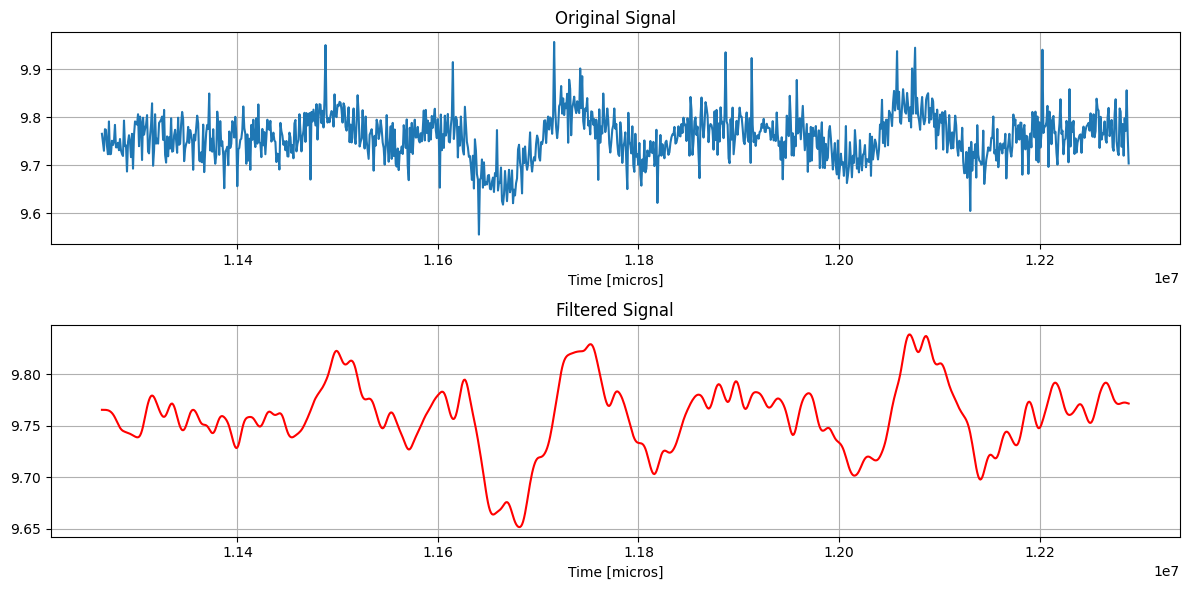

In [85]:
# Plotten des Original- und gefilterten Signals
# spalte die geplottet  werden soll
column_id = column_name_to_id_mapping['accel_x']

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(sample_1024['time_micros'], signals[column_id], label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time [micros]')
# plt.ylim(9.5, 10)  # Fokus auf den interessanten Bereich
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(sample_1024['time_micros'], filtered_data[column_id], label='Filtered Signal', color='red')
plt.title('Filtered Signal')
plt.xlabel('Time [micros]')
# plt.ylim(9.5, 10)  # Fokus auf den interessanten Bereich
plt.grid()

plt.tight_layout()
plt.show()

In [86]:
lp_sample_1024 = sample_1024.copy()
for i, col in enumerate(selected_columns):
    lp_sample_1024[col] = filtered_data[i]
lp_sample_1024

,id,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time_micros_delta
0,0,11264916,9.765453,0.083777,-1.087909,0.043066,-0.054062,0.003054,10241004.0
1,1,11266912,9.765451,0.083775,-1.087909,0.043066,-0.054062,0.003054,1996.0
2,2,11267912,9.765435,0.083760,-1.087909,0.043066,-0.054062,0.003054,1000.0
3,3,11268912,9.765376,0.083697,-1.087902,0.043066,-0.054062,0.003054,1000.0
4,4,11269912,9.765237,0.083530,-1.087870,0.043066,-0.054062,0.003054,1000.0
...,...,...,...,...,...,...,...,...,...
1019,1019,12284912,9.772502,0.071433,-1.142484,0.042672,-0.041081,0.022168,1000.0
1020,1020,12285912,9.772421,0.072755,-1.146899,0.043133,-0.040769,0.022489,1000.0
1021,1021,12286912,9.772198,0.074210,-1.151079,0.043354,-0.040621,0.022642,1000.0
1022,1022,12287912,9.771871,0.075751,-1.154781,0.043363,-0.040615,0.022649,1000.0


In [87]:
lp_sample_1024.to_csv('../data/lp_sample_1024.csv', index=False)